In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc('text', usetex=True); plt.rc('font', family='serif')

In [2]:
dict_data = {
    'dataset':pd.read_csv("../data/processed/dataset.csv", index_col=0),
    'train':pd.read_csv("../data/model/train.csv"),
    'test':pd.read_csv("../data/model/test.csv")
}

In [3]:
dict_v2i = dict(zip([str(i) for i in dict_data['dataset'].iloc[:,1:].values],dict_data['dataset'].iloc[:,1:].index))

In [4]:
dict_pred = {
    'train':pd.read_csv('../data/model/train_pred.csv').x.tolist(),
    'test':pd.read_csv('../data/model/test_pred.csv').x.tolist()
}

In [5]:
dict_index = {
    'train':[dict_v2i.get(str(i),0) for i in dict_data['train'].iloc[:,:-1].values],
    'test':[dict_v2i.get(str(i),0) for i in dict_data['test'].iloc[:,:-1].values]}

In [6]:
df_results = pd.DataFrame({
    'indeces':dict_index['train']+dict_index['test'],
    'label':dict_data['train'].label.tolist()+dict_data['test'].label.tolist(),
    'pred':dict_pred['train']+dict_pred['test']})
df_results['year'] = df_results.indeces.str[:4]
df_results['country'] = df_results.indeces.str[-2:]
df_results['l==p'] = df_results.label==df_results.pred 
df_results['split'] = ['train']*len(dict_index['train'])+['test']*len(dict_pred['test'])

# Check if there are duplicates in the training set and test set


In [7]:
assert pd.concat([dict_data['train'],dict_data['test']]).duplicated().sum()==0, print('There are duplicates!')

# Check the data in the train vs test set

In [8]:
assert sum([i!=0 for df in [dict_index['train'], dict_index['test']] for i in df ]) == dict_data['dataset'].shape[0], print('Missing indeces!')

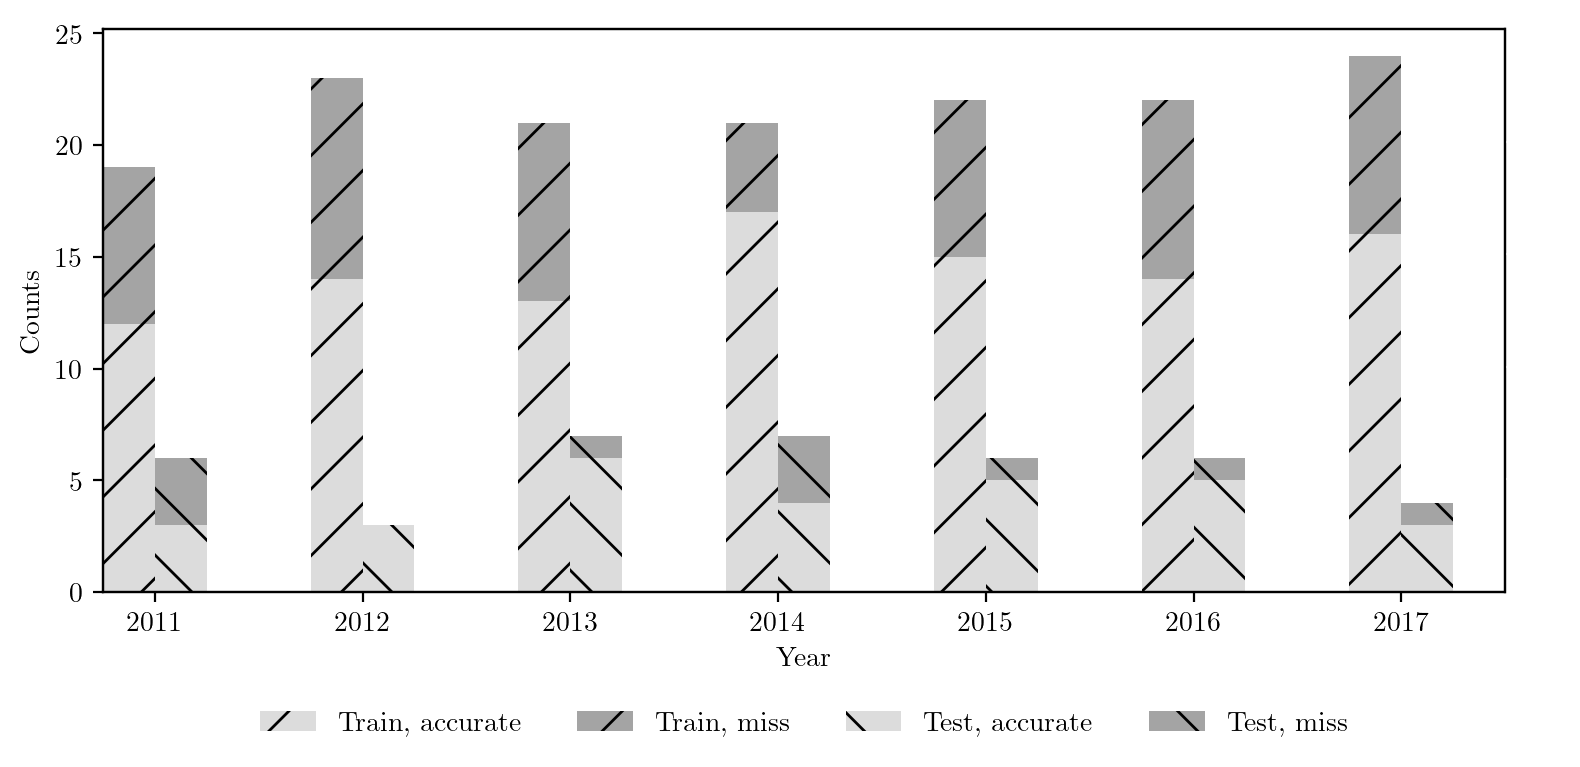

In [9]:
f, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,4),dpi=200); f.patch.set_facecolor('white')
df_cw = df_results[df_results.country!=0].groupby(['split', 'year'])['l==p'].agg(['count', 'sum']).astype(int)
df_cw.columns=['total', 'correct']; df_cw['wrong']=df_cw.total-df_cw.correct
ax2 = axes.twinx()
df_cw[['correct', 'wrong']].loc["train"].astype(int).plot.bar(stacked=True,ax=axes, position=1, width=0.25,alpha=0.6, color=sns.color_palette("Greys", 2), hatch='/')
df_cw[['correct', 'wrong']].loc["test"].astype(int).plot.bar(stacked=True,ax=axes, position=0, width=0.25,alpha=0.6, color=sns.color_palette("Greys", 2), hatch='\\')
axes.tick_params(axis='x', labelrotation=0)
axes.legend(["Train, accurate", 'Train, miss', "Test, accurate", 'Test, miss'], loc='lower center',frameon=False, ncol=4, bbox_to_anchor=(0.5, -.3)) # ["Train, ✓", 'Train, ✗', "Test, ✓", 'Test, ✗']
axes.set_xlabel("Year"); axes.set_ylabel("Counts")
#axes.set_title("Correct classification per year in train and test sets")
axes.set_xticklabels(df_cw[['correct', 'wrong']].loc["test"].astype(int).index.values,color='k')
ax2.tick_params(axis='y', colors='white')
plt.tight_layout()
plt.savefig('../data/latex/predictions_year.pdf', dpi=200, bbox_inches='tight')
plt.show()

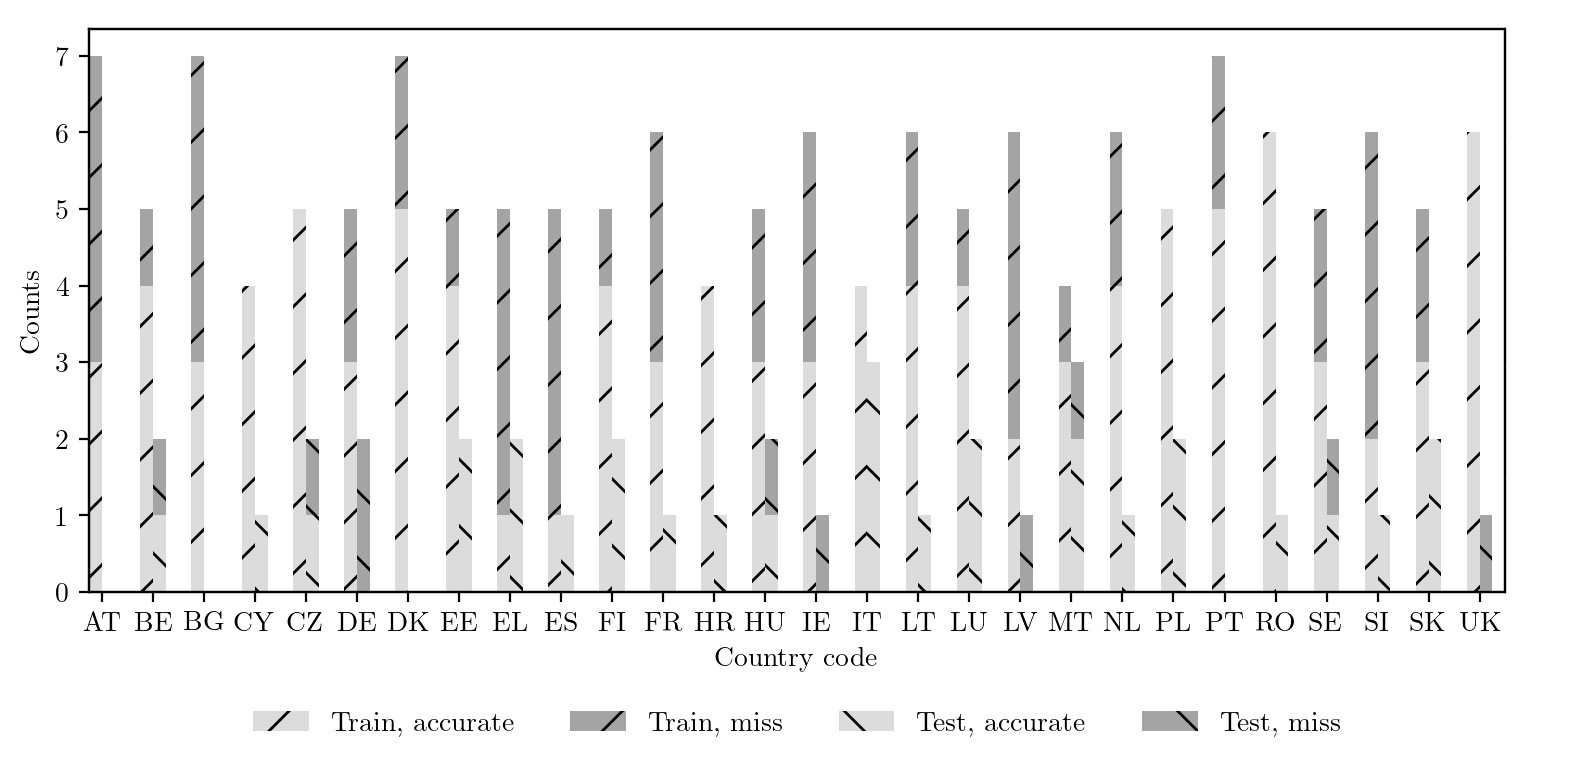

In [10]:
f, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,4),dpi=200); f.patch.set_facecolor('white')
df_cw=df_results[df_results.indeces!=0].groupby(['split', 'country'])['l==p'].agg(['count', 'sum']).astype(int)
df_cw.columns=['total', 'correct']; df_cw['wrong']=df_cw.total-df_cw.correct
ax2 = axes.twinx()
df_cw[['correct', 'wrong']].loc["train"].astype(int).plot.bar(stacked=True,ax=axes, position=1, width=0.25,alpha=0.6, color=sns.color_palette("Greys", 2), hatch='/')
array_missing = pd.Series(list(set(df_results[df_results.indeces!=0].country.unique())-set(df_results.loc[(df_results.indeces!=0) & (df_results.split=='test')].country.unique())), name = 'country')
pd.concat([df_cw[['correct', 'wrong']].loc["test"],pd.DataFrame({'correct':[0]*len(array_missing),'wrong':[0]*len(array_missing)}, index=array_missing)]).sort_index().astype(int).plot.bar(stacked=True,ax=axes, position=0, width=0.25,alpha=0.6, color=sns.color_palette("Greys", 2), hatch='\\')
axes.tick_params(axis='x', labelrotation=0)
axes.legend(["Train, accurate", 'Train, miss', "Test, accurate", 'Test, miss'], loc='lower center',frameon=False, ncol=4, bbox_to_anchor=(0.5, -.3)) #, ncol=2, fontsize=8, 
axes.set_xlabel("Country code"); axes.set_ylabel("Counts")
#axes.set_title("Correct classification per country in train and test sets")
ax2.tick_params(axis='y', colors='white')
plt.tight_layout()
plt.savefig('../data/latex/predictions_country.pdf', dpi=200, bbox_inches='tight')
plt.show()